<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Import-Data-from-File" data-toc-modified-id="Import-Data-from-File-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Import Data from File</a></span></li><li><span><a href="#Data-of-Interest" data-toc-modified-id="Data-of-Interest-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data of Interest</a></span></li><li><span><a href="#Extract-TimeStamp" data-toc-modified-id="Extract-TimeStamp-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Extract TimeStamp</a></span></li><li><span><a href="#Aggregate-by-Hour" data-toc-modified-id="Aggregate-by-Hour-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Aggregate by Hour</a></span></li><li><span><a href="#Compute-CTR" data-toc-modified-id="Compute-CTR-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Compute CTR</a></span></li></ul></li><li><span><a href="#Functions" data-toc-modified-id="Functions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Functions</a></span><ul class="toc-item"><li><span><a href="#TimeStamp-Formatter" data-toc-modified-id="TimeStamp-Formatter-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>TimeStamp Formatter</a></span></li><li><span><a href="#Compute-Avg-&amp;-StDev" data-toc-modified-id="Compute-Avg-&amp;-StDev-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Compute Avg &amp; StDev</a></span></li><li><span><a href="#Outlier-Checker" data-toc-modified-id="Outlier-Checker-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Outlier Checker</a></span></li><li><span><a href="#Simple-Grapher" data-toc-modified-id="Simple-Grapher-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Simple Grapher</a></span></li><li><span><a href="#Interactive-Grapher" data-toc-modified-id="Interactive-Grapher-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Interactive Grapher</a></span></li></ul></li><li><span><a href="#Outlier-Detection" data-toc-modified-id="Outlier-Detection-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Outlier Detection</a></span><ul class="toc-item"><li><span><a href="#Calculate-Moving-Average-&amp;-Standard-Deviation" data-toc-modified-id="Calculate-Moving-Average-&amp;-Standard-Deviation-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Calculate Moving Average &amp; Standard Deviation</a></span></li><li><span><a href="#Check-for-Outliers" data-toc-modified-id="Check-for-Outliers-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Check for Outliers</a></span></li></ul></li><li><span><a href="#Visualizing-Outliers" data-toc-modified-id="Visualizing-Outliers-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Visualizing Outliers</a></span><ul class="toc-item"><li><span><a href="#Simple-Graph" data-toc-modified-id="Simple-Graph-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Simple Graph</a></span></li><li><span><a href="#Interactive-Graph" data-toc-modified-id="Interactive-Graph-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Interactive Graph</a></span></li></ul></li></ul></div>

Please download the source data file (train.gz) before running this script from here: https://www.kaggle.com/akishen74/ctr-practice/data?select=train.gz

## Import Libraries

In [1]:
#Import pandas and numpy for data handling
import pandas as pd
import numpy as np

#Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

## Data Preprocessing

### Import Data from File

The source data file (train.gz) can be dowloaded from here: https://www.kaggle.com/akishen74/ctr-practice/data?select=train.gz

In [2]:
#Since the data file is huge we will load the data into a dataframe in chunks

#size of each chunk
chunksize = 10 ** 6
num_of_chunk = 0
train = pd.DataFrame()

#read the csv file and load data in chunks based on chunk size defined above
for chunk in pd.read_csv('train.gz', chunksize=chunksize):
    num_of_chunk += 1
    train = pd.concat([train, chunk.sample(frac=.05, replace=False, random_state=123)], axis=0)
    print('Processing Chunk No. ' + str(num_of_chunk))     

Processing Chunk No. 1
Processing Chunk No. 2
Processing Chunk No. 3
Processing Chunk No. 4
Processing Chunk No. 5
Processing Chunk No. 6
Processing Chunk No. 7
Processing Chunk No. 8
Processing Chunk No. 9
Processing Chunk No. 10
Processing Chunk No. 11
Processing Chunk No. 12
Processing Chunk No. 13
Processing Chunk No. 14
Processing Chunk No. 15
Processing Chunk No. 16
Processing Chunk No. 17
Processing Chunk No. 18
Processing Chunk No. 19
Processing Chunk No. 20
Processing Chunk No. 21
Processing Chunk No. 22
Processing Chunk No. 23
Processing Chunk No. 24
Processing Chunk No. 25
Processing Chunk No. 26
Processing Chunk No. 27
Processing Chunk No. 28
Processing Chunk No. 29
Processing Chunk No. 30
Processing Chunk No. 31
Processing Chunk No. 32
Processing Chunk No. 33
Processing Chunk No. 34
Processing Chunk No. 35
Processing Chunk No. 36
Processing Chunk No. 37
Processing Chunk No. 38
Processing Chunk No. 39
Processing Chunk No. 40
Processing Chunk No. 41


In [3]:
#Reset index and display the columns information
train.reset_index(inplace=True, drop=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021448 entries, 0 to 2021447
Data columns (total 24 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                float64
 1   click             int64  
 2   hour              int64  
 3   C1                int64  
 4   banner_pos        int64  
 5   site_id           object 
 6   site_domain       object 
 7   site_category     object 
 8   app_id            object 
 9   app_domain        object 
 10  app_category      object 
 11  device_id         object 
 12  device_ip         object 
 13  device_model      object 
 14  device_type       int64  
 15  device_conn_type  int64  
 16  C14               int64  
 17  C15               int64  
 18  C16               int64  
 19  C17               int64  
 20  C18               int64  
 21  C19               int64  
 22  C20               int64  
 23  C21               int64  
dtypes: float64(1), int64(14), object(9)
memory usage: 370.1+ MB


In [4]:
#display the top-5 rows of the dataframe
train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,2.754752e+18,1,14102102,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,...,1,0,17753,320,50,1993,2,1063,-1,33
1,9.630799e+18,0,14102102,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15699,320,50,1722,0,35,100083,79
2,1.048226e+19,0,14102102,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15703,320,50,1722,0,35,100083,79
3,1.830856e+19,0,14102104,1005,1,b8eae5f9,1e334bd3,f028772b,ecad2386,7801e8d9,...,1,0,19950,320,50,1800,3,167,100077,23
4,3.559389e+18,0,14102102,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15701,320,50,1722,0,35,-1,79


### Data of Interest

Since we are interested in Time-Series and CTR relevant fields for this task, we select only those columns into a new dataframe.

In [5]:
#Select necessary data points and copy to a new dataframe
train_simple = train[['id','hour','click']].copy()
train_simple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021448 entries, 0 to 2021447
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   id      float64
 1   hour    int64  
 2   click   int64  
dtypes: float64(1), int64(2)
memory usage: 46.3 MB


In [6]:
#Save the simplified dataframe to a csv for easy access in future if required
train_simple.to_csv('train_simple.csv')
train_simple.head()

,id,hour,click
0,2.754752e+18,14102102,1
1,9.630799e+18,14102102,0
2,1.048226e+19,14102102,0
3,1.830856e+19,14102104,0
4,3.559389e+18,14102102,0


### Extract TimeStamp

In [7]:
#If necessary, to load the data from the simplified csv file above
#train_simple = pd.read_csv('train_simple.csv')
#train_simple.info()

In [8]:
#Convert the 'hour' from string to datatime format in a new column
train_simple['time'] = train_simple['hour'].apply(lambda x: pd.to_datetime(str(x), format='%y%m%d%H'))
train_simple.head()

,id,hour,click,time
0,2.754752e+18,14102102,1,2014-10-21 02:00:00
1,9.630799e+18,14102102,0,2014-10-21 02:00:00
2,1.048226e+19,14102102,0,2014-10-21 02:00:00
3,1.830856e+19,14102104,0,2014-10-21 04:00:00
4,3.559389e+18,14102102,0,2014-10-21 02:00:00


In [9]:
#Check if 'time' is in datetime format
train_simple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021448 entries, 0 to 2021447
Data columns (total 4 columns):
 #   Column  Dtype         
---  ------  -----         
 0   id      float64       
 1   hour    int64         
 2   click   int64         
 3   time    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 61.7 MB


### Aggregate by Hour

In [10]:
# Group the data by time (hour-level) and calculate the total views (count) and total clicks (sum)
train_sample_grouped = train_simple.groupby('time')['click'].agg(['sum', 'count'])
train_sample_grouped.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 2014-10-21 00:00:00 to 2014-10-30 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sum     240 non-null    int64
 1   count   240 non-null    int64
dtypes: int64(2)
memory usage: 5.6 KB


In [11]:
#rename the columns as clicks and visits
train_sample_grouped.columns = ['clicks', 'visits']

In [12]:
#display the top-5 rows of grouped data
train_sample_grouped.head()

,clicks,visits
time,,
2014-10-21 00:00:00,1094,5973
2014-10-21 01:00:00,1226,6845
2014-10-21 02:00:00,1555,10416
2014-10-21 03:00:00,1661,9709
2014-10-21 04:00:00,1953,13203


### Compute CTR

In [13]:
#calculate the Click-Through-Rate (CTR) value at hour-level as clicks/visits
train_sample_grouped['ctr'] = train_sample_grouped['clicks']/train_sample_grouped['visits']
train_sample_grouped.head()

,clicks,visits,ctr
time,,,
2014-10-21 00:00:00,1094,5973,0.183158
2014-10-21 01:00:00,1226,6845,0.179109
2014-10-21 02:00:00,1555,10416,0.149290
2014-10-21 03:00:00,1661,9709,0.171078
2014-10-21 04:00:00,1953,13203,0.147921


<AxesSubplot:title={'center':'CTR over Time'}, xlabel='Time (Hour)', ylabel='CTR'>

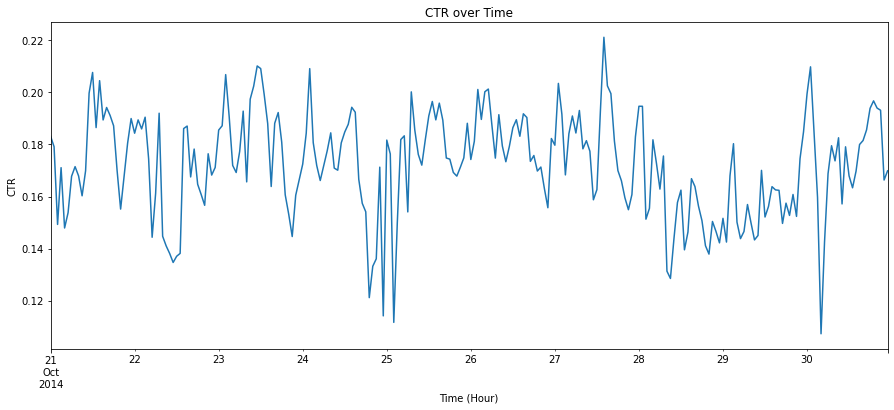

In [14]:
#Plot the CTR value over time
train_sample_grouped['ctr'].plot(figsize=(15,6), title='CTR over Time',xlabel='Time (Hour)', ylabel='CTR')

## Functions

### TimeStamp Formatter

In [15]:
t = '14053010'
def format_time(t):
    '''Converts input string format timestamp to datatime format and returns it'''
    
    return pd.to_datetime(str(t), format='%y%m%d%H')
format_time('14053010')

Timestamp('2014-05-30 10:00:00')

### Compute Avg & StDev

In [16]:
def compute_avg_std(df,window=12):
    '''Calculate CTR rolling mean and standard deviation based on the window period input
    Input: Dataframe with CTR value & Rolling window size for mean/stdev
    Output: Returns a dataframe with moving average and standard deviation columns added to input dataframe
    '''
    
    df['ctr_avg'] = df['ctr'].rolling(window=window).mean()
    df['ctr_std'] = df['ctr'].rolling(window=window).std()
    return df

### Outlier Checker

In [17]:
def outlier_check(row, threshold=1.5):
    '''Check if a row is outlier based on the threshold value input
    Input: row of a dataframe & threshold for outliers
    Output: returns if the row entry is an outlier or not
    '''
    
    if row['ctr_avg'] is not np.NaN:
        score = (row['ctr']-row['ctr_avg'])/row['ctr_std']
        if abs(score)>threshold:
            return 1
        else:
            return 0
    else:
        return np.NaN

### Simple Grapher

In [18]:
def mplot(df):
    '''Takes a dataframe and plots the CTR value and flags outliers in red'''
    
    plt.figure(figsize=(15,6))
    plt.title('CTR & Outliers (in Red)')
    sns.lineplot(x=df.index, y="ctr", data=df, marker='.')
    sns.scatterplot(x=df[train_sample_grouped['is_outlier']==1].index, y="ctr", data=df[df['is_outlier']==1], marker="o", color='red', s=50) 

### Interactive Grapher

In [19]:
def bplot(df):
    '''Takes a dataframe and plots an interactive graph of CTR value and flags outliers with necessary information on hover'''
    
    source = ColumnDataSource(df)

    exp_cmap = LinearColorMapper(palette=['white','red'], #'["red",'yellow','green'], 
                                 low = df['is_outlier'].min(), 
                                 high = df['is_outlier'].max())

    p = figure(x_axis_type="datetime", plot_width=900, plot_height=400, title='CTR & Outliers (in Red)', 
               x_axis_label='Time', y_axis_label='CTR')
    p.line('time', 'ctr', source=source)
    p.circle('time', 'ctr', source=ColumnDataSource(df), fill_color={'field':'is_outlier','transform':exp_cmap}
                     #,color='is_outlier'
             , size=4)
    p.add_tools(HoverTool(show_arrow=True, line_policy='next', mode='vline',
                              tooltips=[('time', '@time{%Y-%m-%d %H:%M}'),('ctr', '$data_y'),('is_outlier','@is_outlier')],formatters={'@time': 'datetime'}))
    p.title.align = 'center'
    show(p)

## Outlier Detection

### Calculate Moving Average & Standard Deviation

In [20]:
#define the moving average window size (in hours)
window_size = 12

#define the standard deviation threshold for outlier detection
threshold = 1.5

In [21]:
#calculate the moving average CTR based on the window size
df_stat = compute_avg_std(train_sample_grouped, window_size)
#df_stat.head(20)

<AxesSubplot:title={'center':'CTR & CTR Moving Average'}, xlabel='Time (Hour)', ylabel='CTR'>

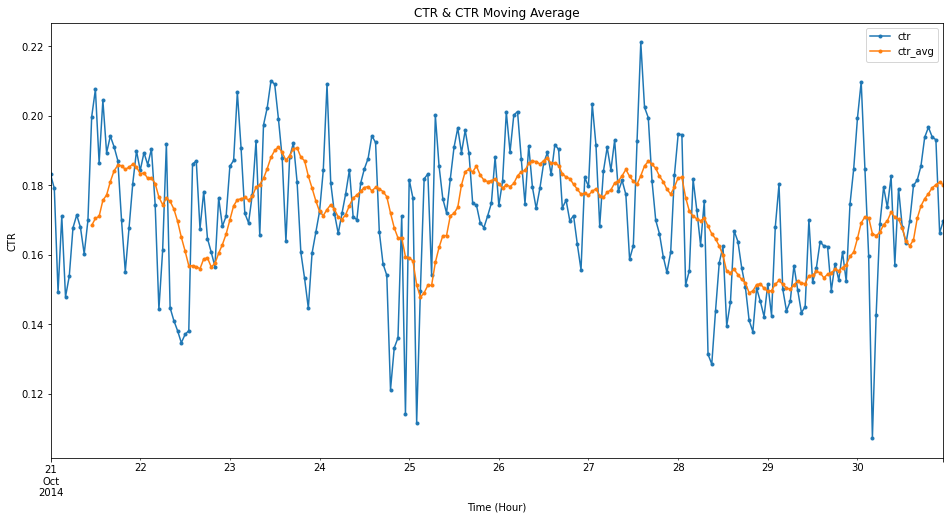

In [22]:
#Plot the CTR & CTR Moving Average
df_stat[['ctr','ctr_avg']].plot(figsize=(16,8), title='CTR & CTR Moving Average', marker='.', 
                                xlabel='Time (Hour)', ylabel='CTR')

### Check for Outliers

In [23]:
#Identify outliers based on the standard deviation threshold
df_stat['is_outlier'] = df_stat.apply(lambda row: outlier_check(row, threshold), axis=1)
#df_stat.head(20)
#df_stat.info()

In [24]:
print('Total no. of Outliers identified with rolling Window Size='+str(window_size)+' and Threshold='+str(threshold)+' is: '+str(df_stat.is_outlier.sum()))

Total no. of Outliers identified with rolling Window Size=12 and Threshold=1.5 is: 36


In [25]:
#Save outliers in a separate dataframe for future use, if any
outliers = df_stat[df_stat['is_outlier']==1].copy()
outliers.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2014-10-21 11:00:00 to 2014-10-30 19:00:00
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   clicks      36 non-null     int64  
 1   visits      36 non-null     int64  
 2   ctr         36 non-null     float64
 3   ctr_avg     36 non-null     float64
 4   ctr_std     36 non-null     float64
 5   is_outlier  36 non-null     int64  
dtypes: float64(3), int64(3)
memory usage: 2.0 KB


## Visualizing Outliers

### Simple Graph

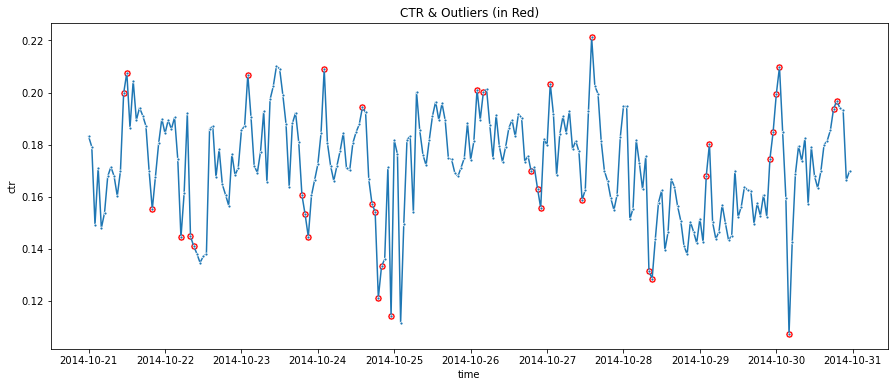

In [26]:
mplot(df_stat)

### Interactive Graph

In [27]:
bplot(df_stat)